In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Train_Data.xlsx')
df.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B0,D0,C0,E0,930.076541,897.167475,855.332105,837.175251,X0
1,B0,D0,C0,E1,929.726216,897.167475,856.459905,837.175251,X0
2,B0,D0,C0,E2,930.076541,897.167475,856.459905,837.096763,X0
3,B0,D0,C0,E3,926.513586,897.167475,856.459905,837.175251,X0
4,B0,D0,C1,E4,930.076541,897.167475,856.459905,836.399490,X0


In [3]:
df.shape

(3695, 9)

In [4]:
df.columns

Index(['CompanyName', 'Financial Department', 'Financial AccountGroup',
       'VendorName', 'Amount Month 1', 'Amount Month 2', 'Amount Month 3',
       'Amount Month 4', 'Category'],
      dtype='object')

In [5]:
df.dtypes

CompanyName                object
Financial Department       object
Financial AccountGroup     object
VendorName                 object
Amount Month 1            float64
Amount Month 2            float64
Amount Month 3            float64
Amount Month 4            float64
Category                   object
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Month 1,3695.0,911.810327,62.004794,0.000000e+00,928.297568,930.076541,930.076541,1163.521001
Amount Month 2,3694.0,886.552037,46.601370,4.821640e-14,896.140129,897.167475,897.167475,1303.063344
Amount Month 3,3695.0,831.308472,65.400269,0.000000e+00,843.234518,856.189903,856.459905,1237.874227
Amount Month 4,3694.0,814.145111,57.790724,4.821640e-14,824.806773,836.696696,837.175251,1116.250670


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CompanyName             3695 non-null   object 
 1   Financial Department    3695 non-null   object 
 2   Financial AccountGroup  3695 non-null   object 
 3   VendorName              3695 non-null   object 
 4   Amount Month 1          3695 non-null   float64
 5   Amount Month 2          3694 non-null   float64
 6   Amount Month 3          3695 non-null   float64
 7   Amount Month 4          3694 non-null   float64
 8   Category                3695 non-null   object 
dtypes: float64(4), object(5)
memory usage: 259.9+ KB


# Exploratory Data Analysis:

1.Missing values

2.all the numerical values

3.Categorical values

4.Numerical Distribution

5.Cardioability of categorical variable

6.Outliers

7.Relationshiip between the Independent and dependent variables.

In [8]:
df.isnull().sum()

CompanyName               0
Financial Department      0
Financial AccountGroup    0
VendorName                0
Amount Month 1            0
Amount Month 2            1
Amount Month 3            0
Amount Month 4            1
Category                  0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

CompanyName               0
Financial Department      0
Financial AccountGroup    0
VendorName                0
Amount Month 1            0
Amount Month 2            0
Amount Month 3            0
Amount Month 4            0
Category                  0
dtype: int64

Text(0.5, 1.0, 'Dept vs Amount')

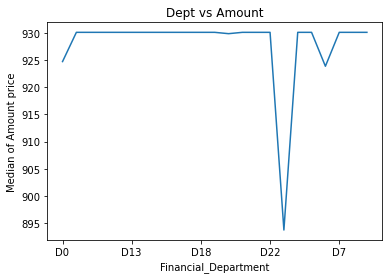

In [11]:
## Relation between different department and the amount:

df.groupby('Financial Department')['Amount Month 1'].median().plot()
plt.xlabel('Financial_Department')
plt.ylabel('Median of Amount price')
plt.title('Dept vs Amount')

In [12]:
categorical_features= [features for features in df.columns if df[features].dtypes =='O']
categorical_features

['CompanyName',
 'Financial Department',
 'Financial AccountGroup',
 'VendorName',
 'Category']

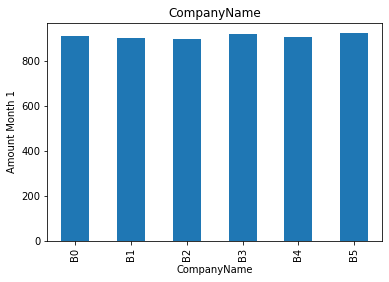

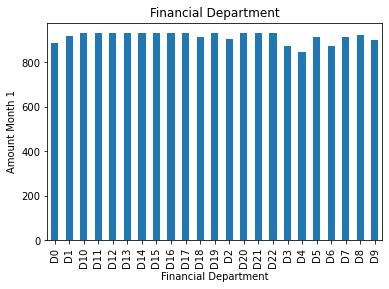

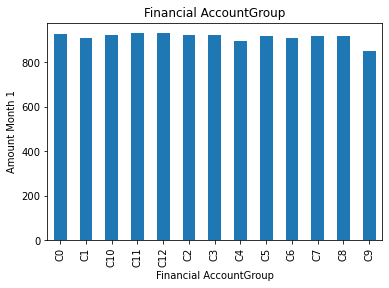

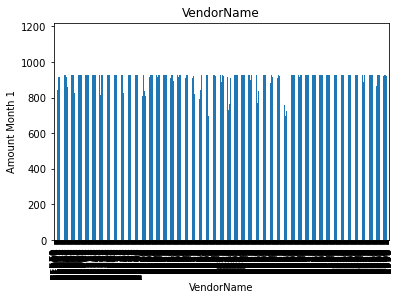

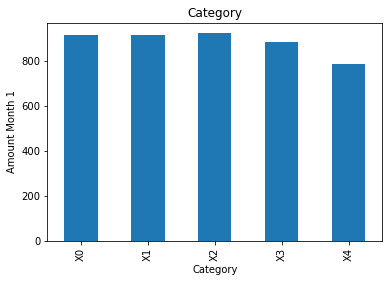

In [13]:
# relation between the Amount_Month_1 Vs Department:

for features in categorical_features:
    data=df.copy()
    data.groupby(features)['Amount Month 1'].mean().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Amount Month 1')
    plt.title(features)
    plt.show()

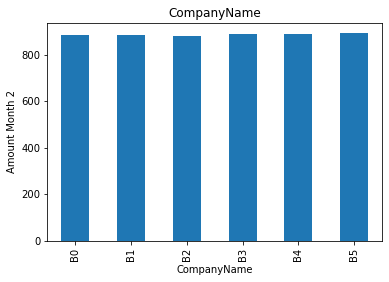

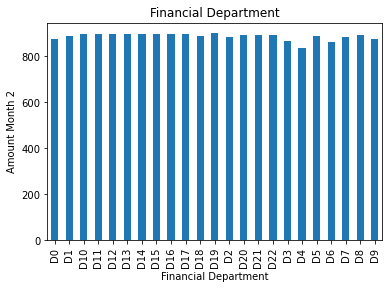

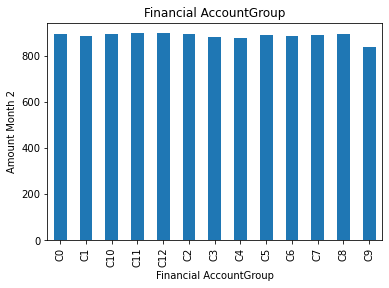

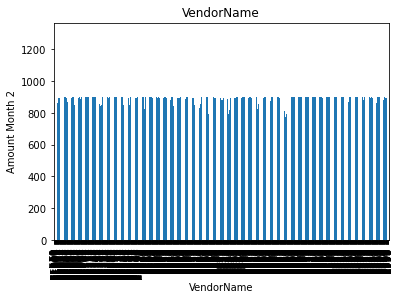

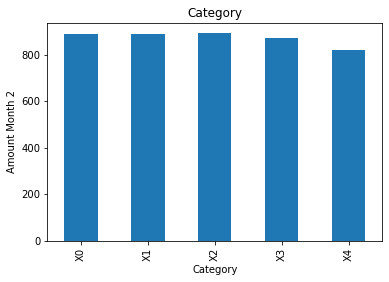

In [14]:
for features in categorical_features:
    data=df.copy()
    data.groupby(features)['Amount Month 2'].mean().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Amount Month 2')
    plt.title(features)
    plt.show()

In [15]:
for features in categorical_features:
    print(df[features].unique())

['B0' 'B1' 'B2' 'B3' 'B4' 'B5']
['D0' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13'
 'D14' 'D15' 'D16' 'D17' 'D18' 'D19' 'D20' 'D21' 'D22']
['C0' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12']
['E0' 'E1' 'E2' ... 'E1290' 'E1291' 'E1292']
['X0' 'X1' 'X2' 'X3' 'X4']


In [16]:
df.groupby('VendorName')['Amount Month 1'].mean()

VendorName
E0       930.076541
E1       929.726216
E10      929.978383
E100     839.154200
E1000    928.357161
            ...    
E995     928.964922
E996     929.531936
E997     912.853520
E998     985.294034
E999     927.739648
Name: Amount Month 1, Length: 1292, dtype: float64

In [17]:
for features in categorical_features:
    print(df.groupby(features)['Amount Month 1'].mean())

CompanyName
B0    913.121906
B1    902.341512
B2    897.975862
B3    921.059050
B4    908.615764
B5    922.606202
Name: Amount Month 1, dtype: float64
Financial Department
D0     887.372941
D1     916.372822
D10    930.076541
D11    930.076541
D12    930.076541
D13    930.076541
D14    930.076541
D15    930.076541
D16    930.076541
D17    930.076541
D18    914.570292
D19    930.076541
D2     905.741332
D20    930.076541
D21    930.076541
D22    930.076541
D3     871.889767
D4     847.534166
D5     910.876023
D6     872.275144
D7     913.900805
D8     923.534622
D9     898.215791
Name: Amount Month 1, dtype: float64
Financial AccountGroup
C0     924.275986
C1     909.703546
C10    923.694253
C11    930.076541
C12    930.076541
C2     920.312167
C3     920.806970
C4     892.686808
C5     916.391937
C6     908.292332
C7     918.652827
C8     917.367745
C9     847.534166
Name: Amount Month 1, dtype: float64
VendorName
E0       930.076541
E1       929.726216
E10      929.978383
E100     839

In [18]:
np.unique(df['Category'],return_counts=True)

(array(['X0', 'X1', 'X2', 'X3', 'X4'], dtype=object),
 array([3136,  231,  117,  194,   15], dtype=int64))

In [19]:
discrete_feature=[features for features in df.columns if df[features].dtypes =="float64"]
discrete_feature

['Amount Month 1', 'Amount Month 2', 'Amount Month 3', 'Amount Month 4']

<Figure size 1440x720 with 0 Axes>

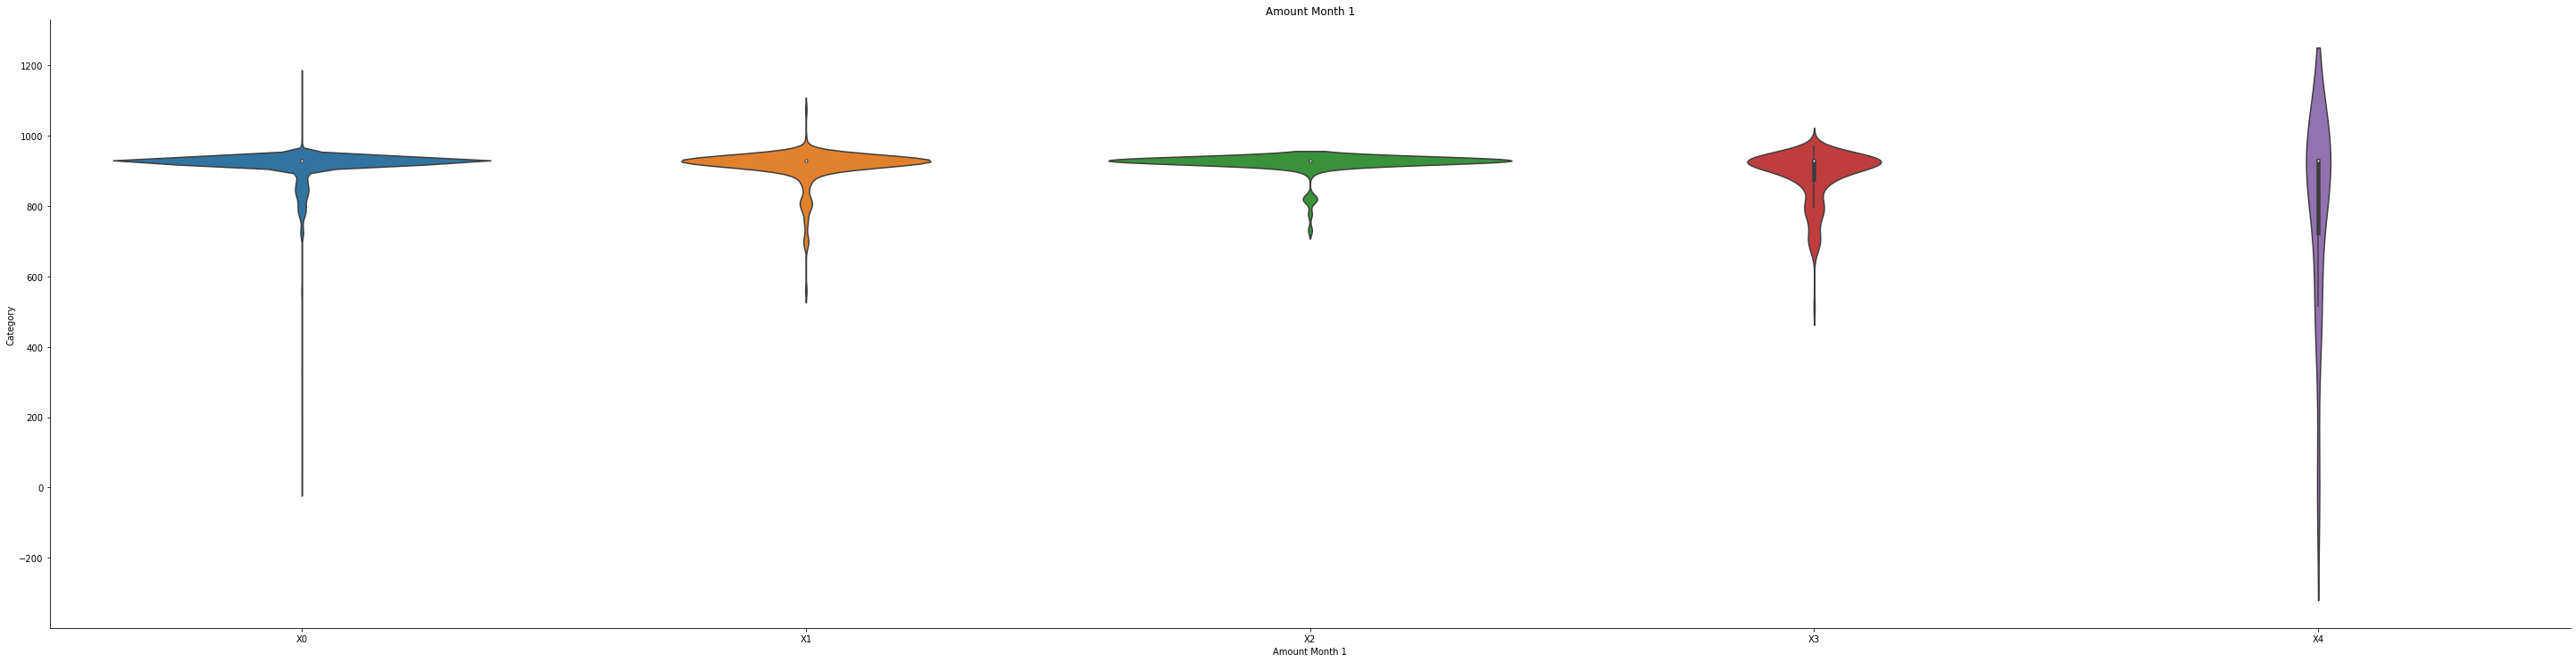

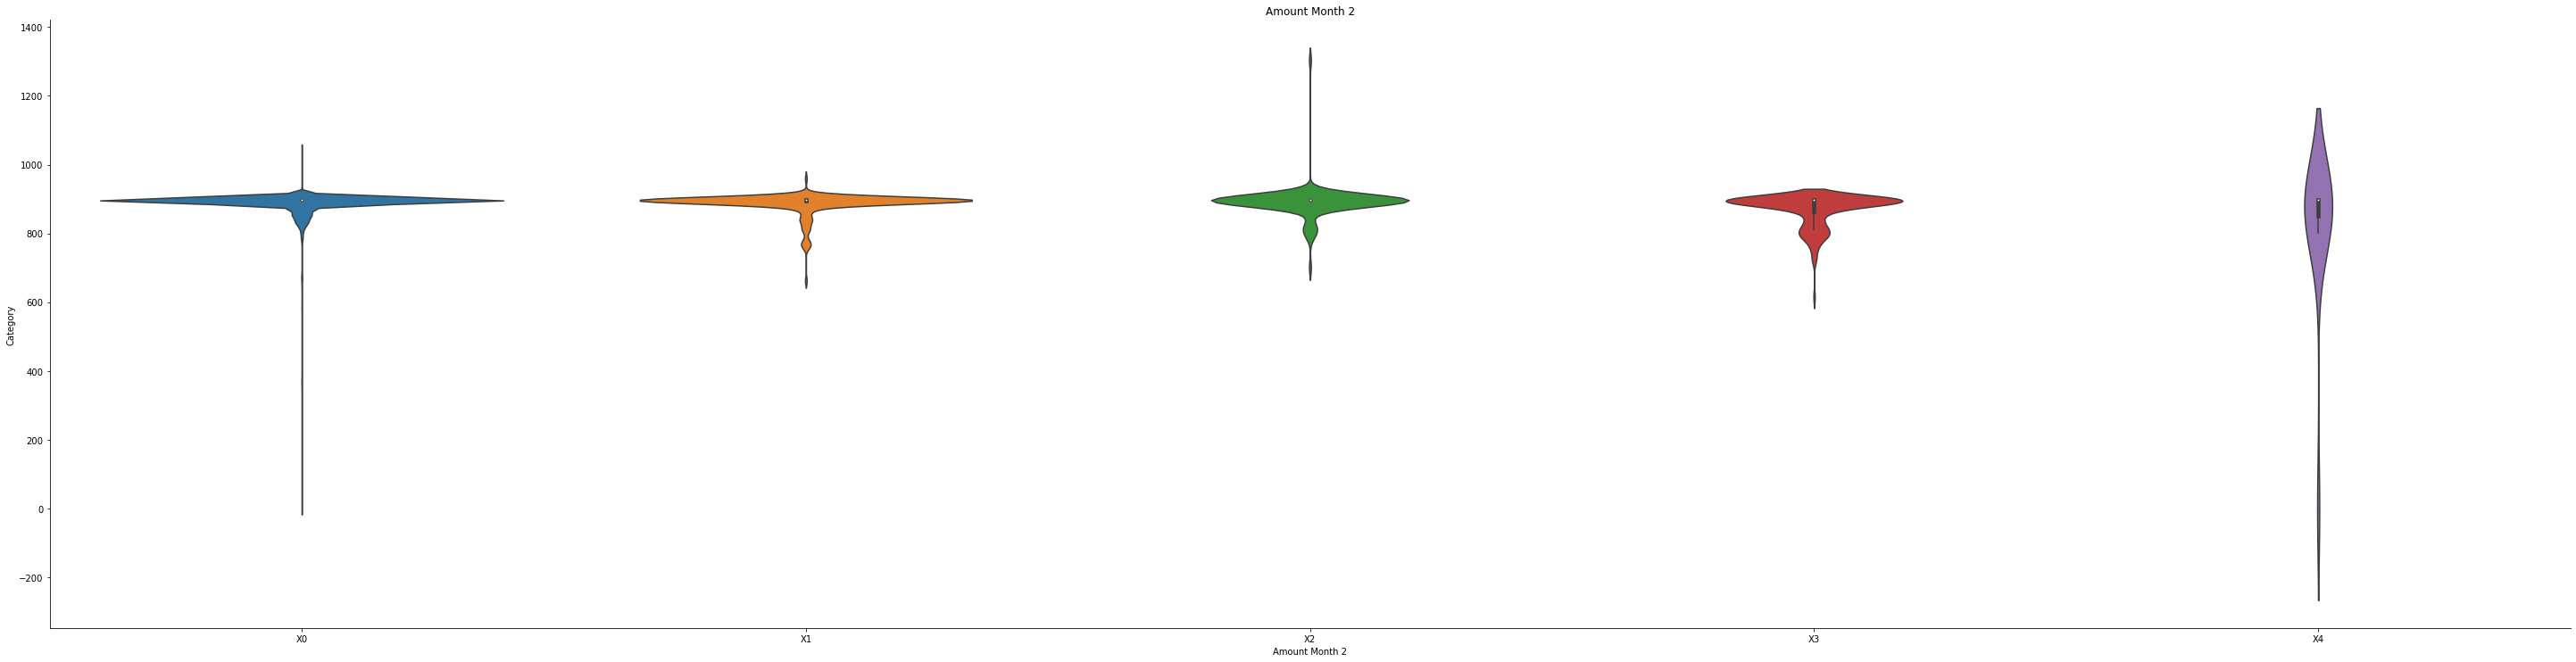

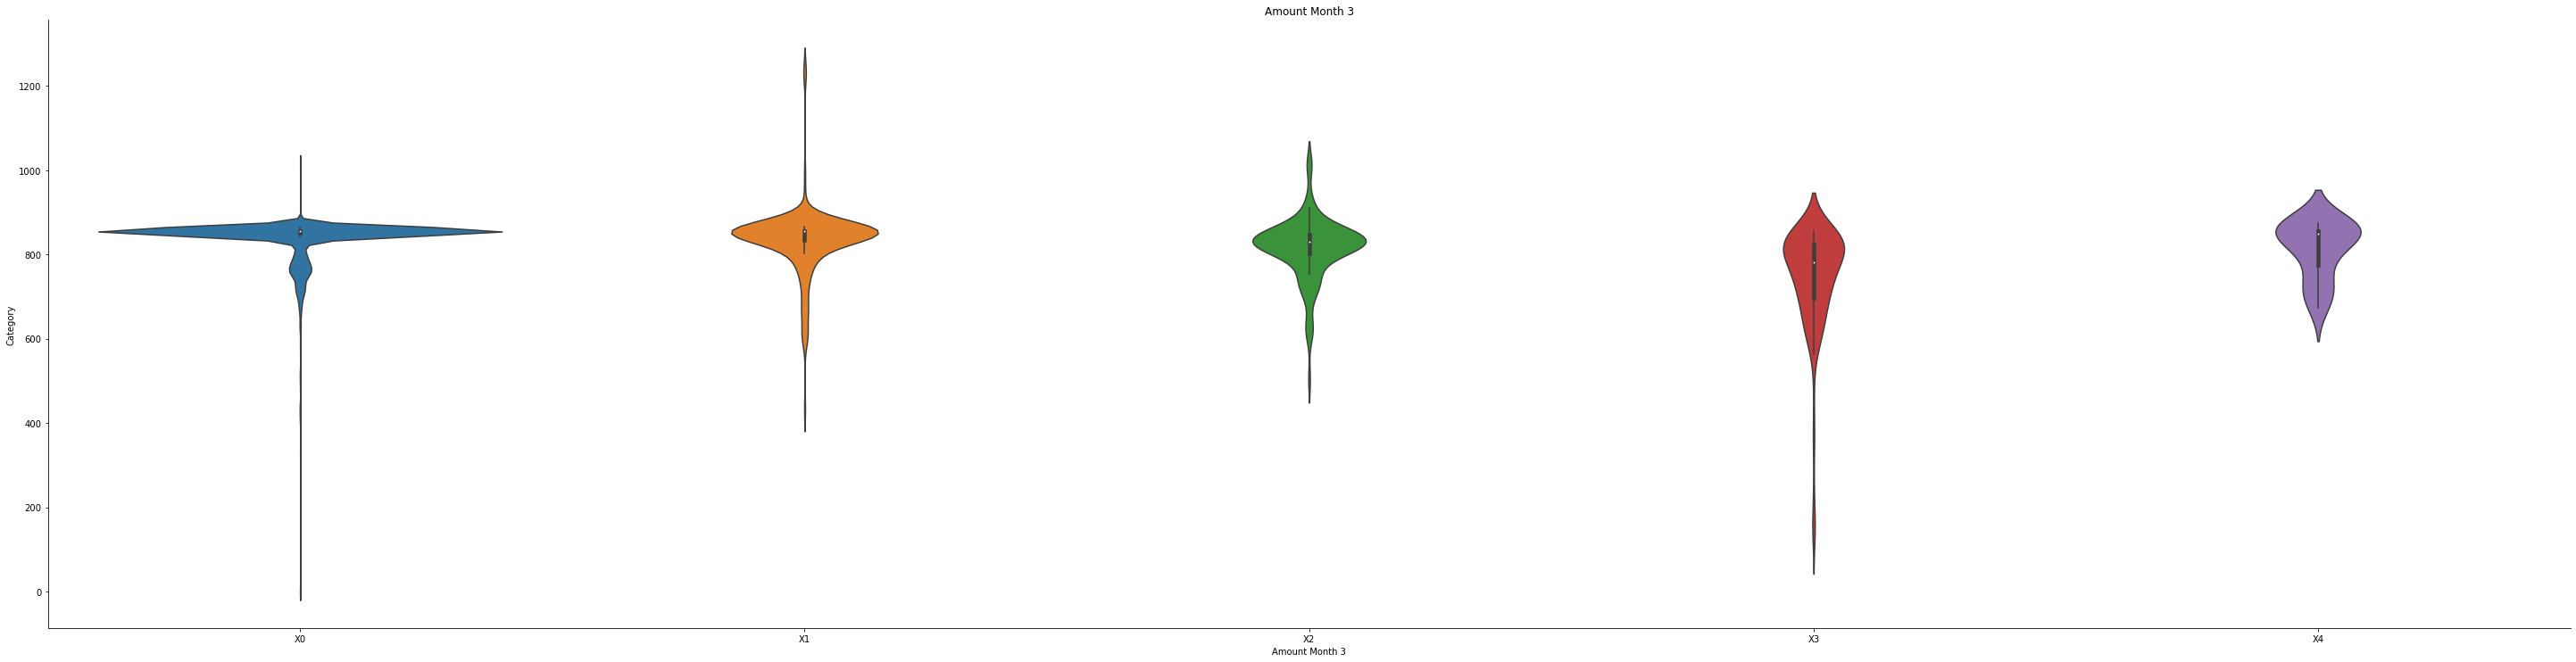

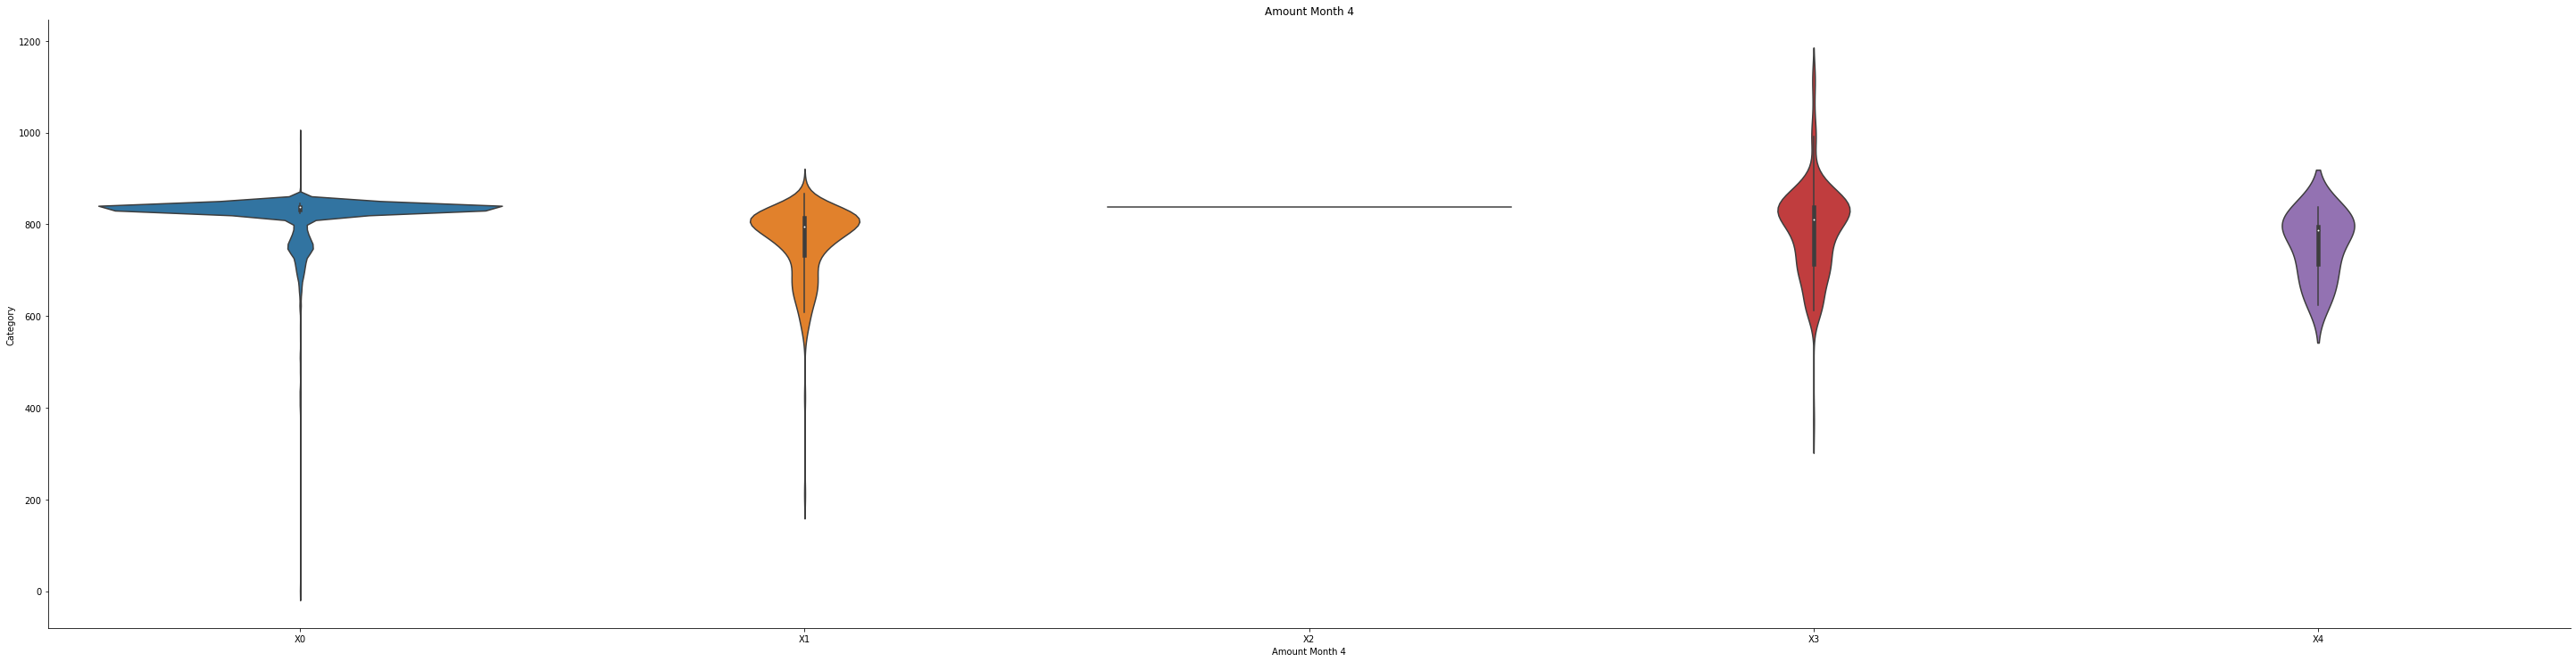

In [20]:
plt.figure(figsize=(20,10))
for features in discrete_feature:
    data=df.copy()
    sns.catplot(x='Category',y= features,data=df,height=10,aspect=4,kind='violin',margin_titles=True)
    plt.xlabel(features)
    plt.ylabel('Category')
    plt.title(features)
    plt.show()

In [21]:
def df_Encode(df):
    for column in df.columns[~df.columns.isin(['Amount Month 1','Amount Month 2','Amount Month 3','Amount Month 4'])]:
        df[column]=df[column].factorize()[0] ## Factorize method is used for numerical representation
                                                        ##of an array having categorical features
    return df
df_copy=df_Encode(df.copy())

In [22]:
df_copy.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,0,0,0,0,930.076541,897.167475,855.332105,837.175251,0
1,0,0,0,1,929.726216,897.167475,856.459905,837.175251,0
2,0,0,0,2,930.076541,897.167475,856.459905,837.096763,0
3,0,0,0,3,926.513586,897.167475,856.459905,837.175251,0
4,0,0,1,4,930.076541,897.167475,856.459905,836.399490,0


In [23]:
df_copy.isnull().sum()

CompanyName               0
Financial Department      0
Financial AccountGroup    0
VendorName                0
Amount Month 1            0
Amount Month 2            0
Amount Month 3            0
Amount Month 4            0
Category                  0
dtype: int64

# EDA for Test Data aslo:

In [24]:
df1=pd.read_excel('Test_Data.xlsx')
df1.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B6,D1,C0,E134,930.076541,897.003874,856.459905,837.175251,NaN
1,B6,D1,C0,E1293,930.076541,888.450556,836.995193,818.672007,NaN
2,B6,D1,C0,E390,930.076541,895.639633,856.459905,837.175251,NaN
3,B6,D1,C0,E1294,930.076541,897.167475,856.459905,837.175251,NaN
4,B6,D1,C0,E1295,930.076541,897.167475,853.612419,837.175251,NaN


In [25]:
df1.drop('Category',axis=1,inplace=True)

In [26]:
df1.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
0,B6,D1,C0,E134,930.076541,897.003874,856.459905,837.175251
1,B6,D1,C0,E1293,930.076541,888.450556,836.995193,818.672007
2,B6,D1,C0,E390,930.076541,895.639633,856.459905,837.175251
3,B6,D1,C0,E1294,930.076541,897.167475,856.459905,837.175251
4,B6,D1,C0,E1295,930.076541,897.167475,853.612419,837.175251


In [27]:
df1.isnull().sum()

CompanyName               0
Financial Department      0
Financial AccountGroup    0
VendorName                0
Amount Month 1            3
Amount Month 2            0
Amount Month 3            2
Amount Month 4            0
dtype: int64

In [28]:
df1['Amount Month 1']=df1['Amount Month 1'].fillna(df1['Amount Month 1'].mean(),axis=0)
df1['Amount Month 3']=df1['Amount Month 3'].fillna(df1['Amount Month 3'].mean(),axis=0)

In [29]:
df1.isnull().sum()

CompanyName               0
Financial Department      0
Financial AccountGroup    0
VendorName                0
Amount Month 1            0
Amount Month 2            0
Amount Month 3            0
Amount Month 4            0
dtype: int64

In [30]:
def df1_Encode(df1):
    for column in df1.columns[~df1.columns.isin(['Amount Month 1','Amount Month 2','Amount Month 3','Amount Month 4'])]:
        df1[column]=df1[column].factorize()[0] ## Factorize method is used for numerical representation
                                                        ##of an array having categorical features
    return df1
df1_copy=df1_Encode(df1.copy())

In [31]:
df1_copy.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
0,0,0,0,0,930.076541,897.003874,856.459905,837.175251
1,0,0,0,1,930.076541,888.450556,836.995193,818.672007
2,0,0,0,2,930.076541,895.639633,856.459905,837.175251
3,0,0,0,3,930.076541,897.167475,856.459905,837.175251
4,0,0,0,4,930.076541,897.167475,853.612419,837.175251


# Feature Selections:

Which Contribute have a good relation with target variables:

1. heatmap
2. Feature_importance
3. SelectKBest

In [32]:
# Splitting the X and Y datasets:

X=df_copy.drop('Category',axis=1)
y=df_copy['Category']

In [33]:
X.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
0,0,0,0,0,930.076541,897.167475,855.332105,837.175251
1,0,0,0,1,929.726216,897.167475,856.459905,837.175251
2,0,0,0,2,930.076541,897.167475,856.459905,837.096763
3,0,0,0,3,926.513586,897.167475,856.459905,837.175251
4,0,0,1,4,930.076541,897.167475,856.459905,836.399490


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [35]:
df_copy.columns

Index(['CompanyName', 'Financial Department', 'Financial AccountGroup',
       'VendorName', 'Amount Month 1', 'Amount Month 2', 'Amount Month 3',
       'Amount Month 4', 'Category'],
      dtype='object')

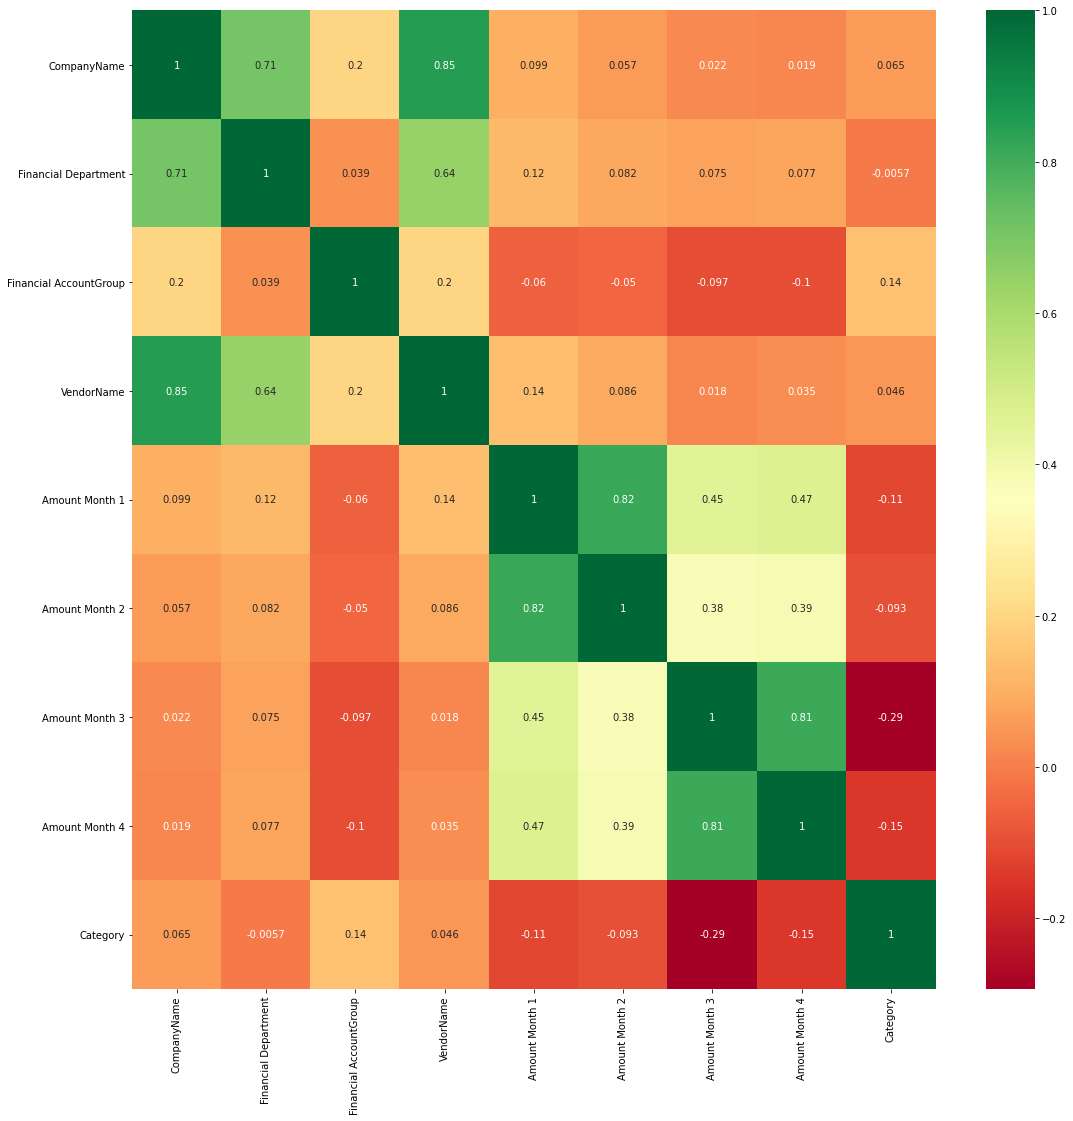

In [36]:
# Finds the correlation between the independent and dependent features:

plt.figure(figsize=(18,18))
sns.heatmap(df_copy.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [37]:
## Importance feature using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [38]:
print(selection.feature_importances_)

[0.05391559 0.03541954 0.05697212 0.07180082 0.04884135 0.05333977
 0.35941277 0.32029804]


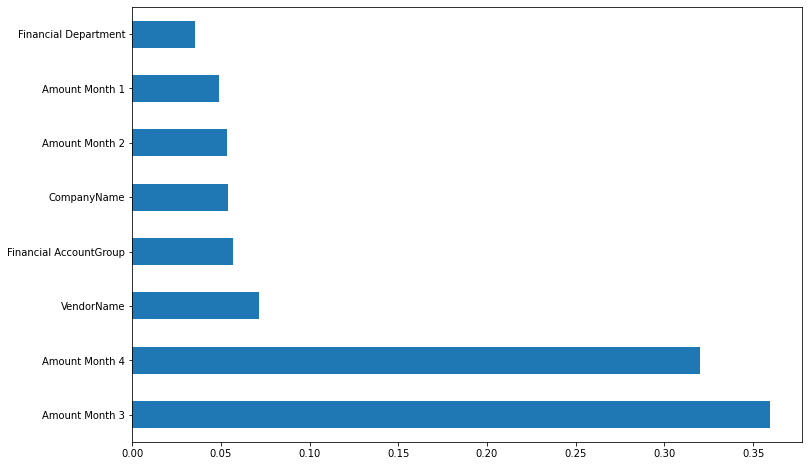

In [39]:
# plotting the importance features:

plt.figure(figsize=(12,8))
feat_import=pd.Series(selection.feature_importances_,index=X.columns)
feat_import.nlargest(20).plot.barh()
plt.show()

# Buliding the model

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2954, 8), (2954,), (739, 8), (739,))

In [42]:
## KNeighbour Regression:

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_preds=knn.predict(X_test)
y_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score
accuracy_score(y_test,y_preds)

0.8971583220568335

In [45]:
confusion_matrix(y_test,y_preds)

array([[626,   4,   0,   4,   1],
       [ 19,  16,   0,   2,   1],
       [ 16,   0,   8,   0,   0],
       [ 22,   1,   3,  13,   0],
       [  0,   2,   1,   0,   0]], dtype=int64)

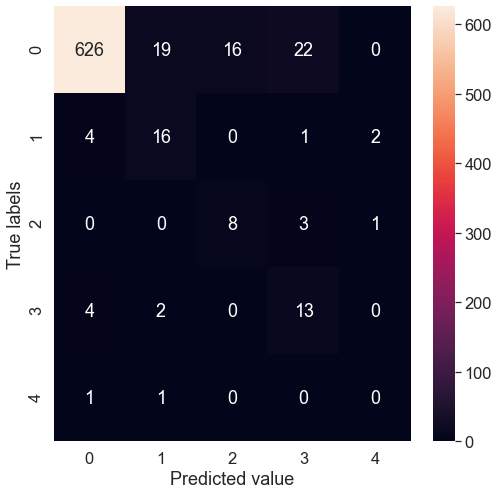

In [46]:
sns.set(font_scale=1.5)

def plot_con_mat(y_preds,y_test):
    """
    Plotting the confusion matrix with tht help of heatmap
    """
    fig,ax=plt.subplots(figsize=(8,8))
    ax=sns.heatmap(confusion_matrix(y_preds,y_test),
                  annot=True,
                  cbar=True,fmt='d')
    plt.xlabel('Predicted value')
    plt.ylabel('True labels')
    
plot_con_mat(y_preds,y_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_features=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=5)

In [48]:
y_pred=rf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
rf.score(X_train,y_train)

1.0

In [50]:
rf.score(X_test,y_test)

0.9715832205683356

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9715832205683356

In [52]:
confusion_matrix(y_test,y_pred)

array([[628,   3,   1,   3,   0],
       [  2,  35,   1,   0,   0],
       [  1,   0,  23,   0,   0],
       [  7,   0,   0,  32,   0],
       [  0,   2,   1,   0,   0]], dtype=int64)

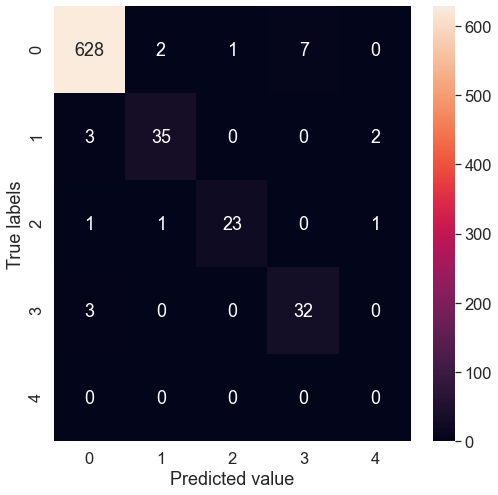

In [53]:
def plot_con_mat(y_pred,y_test):
    """
    Plotting the confusion matrix with tht help of heatmap
    """
    fig,ax=plt.subplots(figsize=(8,8))
    ax=sns.heatmap(confusion_matrix(y_pred,y_test),
                  annot=True,
                  cbar=True,fmt='d')
    plt.xlabel('Predicted value')
    plt.ylabel('True labels')
    
plot_con_mat(y_pred,y_test)

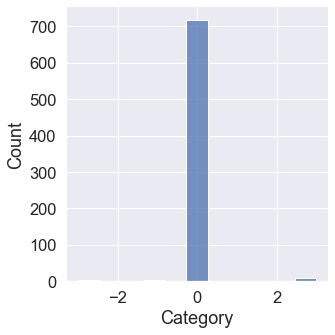

In [54]:
sns.displot(y_test-y_pred)
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       635
           1       0.88      0.92      0.90        38
           2       0.88      0.96      0.92        24
           3       0.91      0.82      0.86        39
           4       0.00      0.00      0.00         3

    accuracy                           0.97       739
   macro avg       0.73      0.74      0.73       739
weighted avg       0.97      0.97      0.97       739



C:\Users\sathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
ypred=dtc.predict(X_test)
ypred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
accuracy_score(y_test,ypred)

0.952638700947226

# Hyper Parameter Tuning:
RandomizedSearchCV 

GridSearchCV

fit the model

In [59]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features= ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split= [2,4,6,8,10,15]
min_samples_leaf=[1,2,5,10]

In [60]:
# Create the Grid parameters:

random_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_split':min_samples_split,
    'max_depth': max_depth,
    'min_samples_leaf':min_samples_leaf
}

In [61]:
# apply the random_grid:
from sklearn.model_selection import RandomizedSearchCV


reg_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='accuracy',
                      n_jobs=1)

In [62]:
reg_rf.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(max_features=5), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy')

In [63]:
reg_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

# Save the Model:

In [64]:
prediction= reg_rf.predict(X_test)

NameError: name 'reg_gs' is not defined

In [ ]:
prediction[:10]

In [64]:
import pickle

file=open('model_rf.pkl','wb')

# dump the data:

pickle.dump(reg_rf,file)

In [65]:
model=open('model_rf.pkl','rb')
motor=pickle.load(model)

In [66]:
y_predict=motor.predict(X_test)

In [67]:
accuracy_score(y_test,y_predict)

0.9675236806495264

In [68]:
df1_copy.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
0,0,0,0,0,930.076541,897.003874,856.459905,837.175251
1,0,0,0,1,930.076541,888.450556,836.995193,818.672007
2,0,0,0,2,930.076541,895.639633,856.459905,837.175251
3,0,0,0,3,930.076541,897.167475,856.459905,837.175251
4,0,0,0,4,930.076541,897.167475,853.612419,837.175251


In [69]:
lst=[list(df1_copy.loc[i].values) for i in range(len(df1_copy))]

In [70]:
lst[1]

[0.0, 0.0, 0.0, 1.0, 930.0765408, 888.450556, 836.995193, 818.672007]

In [71]:
category=motor.predict([[0.0, 0.0, 0.0, 1.0, 930.0765408, 888.450556, 836.995193, 818.672007]])
print(category)

[0]


In [72]:
data=pd.read_excel('Train_Data.xlsx')
data.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B0,D0,C0,E0,930.076541,897.167475,855.332105,837.175251,X0
1,B0,D0,C0,E1,929.726216,897.167475,856.459905,837.175251,X0
2,B0,D0,C0,E2,930.076541,897.167475,856.459905,837.096763,X0
3,B0,D0,C0,E3,926.513586,897.167475,856.459905,837.175251,X0
4,B0,D0,C1,E4,930.076541,897.167475,856.459905,836.399490,X0


In [73]:
factor = pd.factorize(data['Category'])
data.Category = factor[0]
definitions = factor[1]
print(data.Category.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64
Index(['X0', 'X1', 'X2', 'X3', 'X4'], dtype='object')


In [74]:
reversefactor = dict(zip(range(5),definitions))
reversefactor

{0: 'X0', 1: 'X1', 2: 'X2', 3: 'X3', 4: 'X4'}

In [75]:
Cat=[]
for i in range(len(df1_copy)):
    category= motor.predict([lst[i]])
    Category= np.vectorize(reversefactor.get)(category)
    Cat.append(Category)

In [76]:
Category=[]
for i in range(len(Cat)):    
    category=Cat[i]
    print(Category.append(category))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [77]:
final=pd.DataFrame(Category,columns=['Category'])

In [78]:
final

,Category
0,X0
1,X0
2,X0
3,X0
4,X0
...,...
1020,X0
1021,X0
1022,X2
1023,X0


In [175]:
len(df_copy)

3693

In [178]:
for i in range(10):
    l=i*10
    print(l)

0
10
20
30
40
50
60
70
80
90


In [79]:
data_final=pd.concat([df1,final],axis=1)
data_final.head()

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B6,D1,C0,E134,930.076541,897.003874,856.459905,837.175251,X0
1,B6,D1,C0,E1293,930.076541,888.450556,836.995193,818.672007,X0
2,B6,D1,C0,E390,930.076541,895.639633,856.459905,837.175251,X0
3,B6,D1,C0,E1294,930.076541,897.167475,856.459905,837.175251,X0
4,B6,D1,C0,E1295,930.076541,897.167475,853.612419,837.175251,X0


In [80]:
data_final.to_excel('Final_Test_Data.xlsx')

In [82]:
np.unique(final,return_counts=True)

(array(['X0', 'X1', 'X2', 'X3'], dtype=object),
 array([932,  49,  28,  16], dtype=int64))